# Scraping and analyzing Facebook posts

Data analysis has become a key function within companies. Most companies are relying on analysis to make informed decisions and also predict the future. To be able to make such decisions they need to have large datasets that relates or affects their business models. 

Datasets can be gotten through various methods eg;
* Scraping
* Conducting surveys.
* Interviews
* Sampling
* Research
* etc

## Scraping
This is the method of pulling information from websites into your most preferred file, database etc. The method is an efficient way to grab a great deal of information for analysis, processing, or presentation.

Scraping of certain platforms such as social media platforms can help a company make informed decisions from users reactions, comments and shares. 

**Example** 
A person opening a restaurant in a certain area can check Facebook pages of competitors within that location. Get helpful insights from the reactions, comments and shares of their followers. From the insight developed the new restaurant can decide to;
1. Offer a discount to any meal that most people like or have a positive feedback
2. Improve on quality of certain meals to get more customers
3. Use different flavors/recipes to make other delicious products
4. etc


In this case I am going to scrap posts from a facebook page and tend to draw some insight from the posts made on that page.

###### Tools used
Facebook scraper -  Python library built to help in scrapping posts (Has BeautifulSoup in it already)
Pandas - Used for creating and working with dataframes and series of dataset obtained
Matplotlib/ Seaborn - For plots
Azure text analytics - Sentiment analysis and also key phrase extraction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from facebook_scraper import get_posts

In [2]:
posts = []

for post in get_posts('bbcnews', cookies='cookies.txt', extra_info=True, pages=5, options={ "comments": False }):
    posts.append(post)

/Users/mac/projects/analysis/facebook/env/lib/python3.11/site-packages/facebook_scraper/facebook_scraper.py:912: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")
/Users/mac/projects/analysis/facebook/env/lib/python3.11/site-packages/facebook_scraper/facebook_scraper.py:855: UserWarning: Facebook language detected as en_GB - for best results, set to en_US
  warnings.warn(


### Create a dataframe
In the next step we create a dataframe from the `posts dataset`

In [4]:
posts_df = pd.DataFrame(posts)
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        50 non-null     object        
 1   text                           50 non-null     object        
 2   post_text                      50 non-null     object        
 3   shared_text                    50 non-null     object        
 4   original_text                  0 non-null      object        
 5   time                           50 non-null     datetime64[ns]
 6   timestamp                      50 non-null     int64         
 7   image                          2 non-null      object        
 8   image_lowquality               50 non-null     object        
 9   images                         50 non-null     object        
 10  images_description             50 non-null     object        
 11  images_lowquality    

Scraped data from the FaceBook post is quite fruitful. From the information above we just found out that our dataset has `50 columns` and `51 rows - data entries`. Our columns are also of different datatypes i.e; bool, datetime, int and object. 

Now we are certain that our data can be used for data wrangling and for analytics purposes.

We can read the first 5 rows of the data that we obtained.

In [6]:
posts_df.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,676752147822114,"""Approaching wild animals can drastically affe...","""Approaching wild animals can drastically affe...",BBC.COM\nYellowstone kills baby bison after pa...,None,2023-05-25 11:04:34,1685001874,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,https://www.facebook.com/bbcnews/posts/6767521...,"{'like': 101, 'love': 4, 'haha': 1, 'wow': 2, ...",250,None,228735667216,None,None,[],False,2023-05-25 11:31:20.806724
1,676713947825934,"""A star whose light will never fade.""\n\nBBC.C...","""A star whose light will never fade.""",BBC.COM\nTributes pour in for 'total legend' T...,None,2023-05-25 10:00:37,1684998037,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,https://www.facebook.com/bbcnews/posts/6767139...,"{'like': 948, 'love': 164, 'wow': 2, 'care': 3...",2024,None,228735667216,None,None,[],False,2023-05-25 11:31:23.682607
2,676689697828359,The cap limits how much suppliers can charge h...,The cap limits how much suppliers can charge h...,BBC.CO.UK\nEnergy bills to fall under new pric...,None,2023-05-25 09:17:25,1684995445,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,https://www.facebook.com/bbcnews/posts/6766896...,"{'like': 145, 'love': 9, 'haha': 19, 'wow': 1,...",175,None,228735667216,None,None,[],False,2023-05-25 11:31:26.615313
3,676668564497139,"""Once you've seen it, you can't unsee it.""\n\n...","""Once you've seen it, you can't unsee it.""",BBC.COM\nAerial photo of harbour makes it look...,None,2023-05-25 08:32:03,1684992723,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,https://www.facebook.com/bbcnews/posts/6766685...,"{'like': 1841, 'love': 173, 'haha': 3, 'wow': ...",2164,None,228735667216,None,None,[],False,2023-05-25 11:31:29.595112
4,676640061166656,"""The most incredible animals."" 🦇\n\nBBC.COM\nB...","""The most incredible animals."" 🦇",BBC.COM\nBirth of world's rarest fruit bat cau...,None,2023-05-25 07:31:08,1684989068,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,https://www.facebook.com/bbcnews/posts/6766400...,"{'like': 1102, 'love': 164, 'haha': 1, 'wow': ...",1300,None,228735667216,None,None,[],False,2023-05-25 11:31:32.199858


Save dataframe to a CSV file before we start our analysis.

In [7]:
# posts_df.to_csv(r'bbc_fb_posts.csv', index=False)

## Case 1: Plot number of likes, shares & comments vs timeline

In my first case I will try to plot the number of likes, shares and comments vs the time of posting in a line chart for visualization

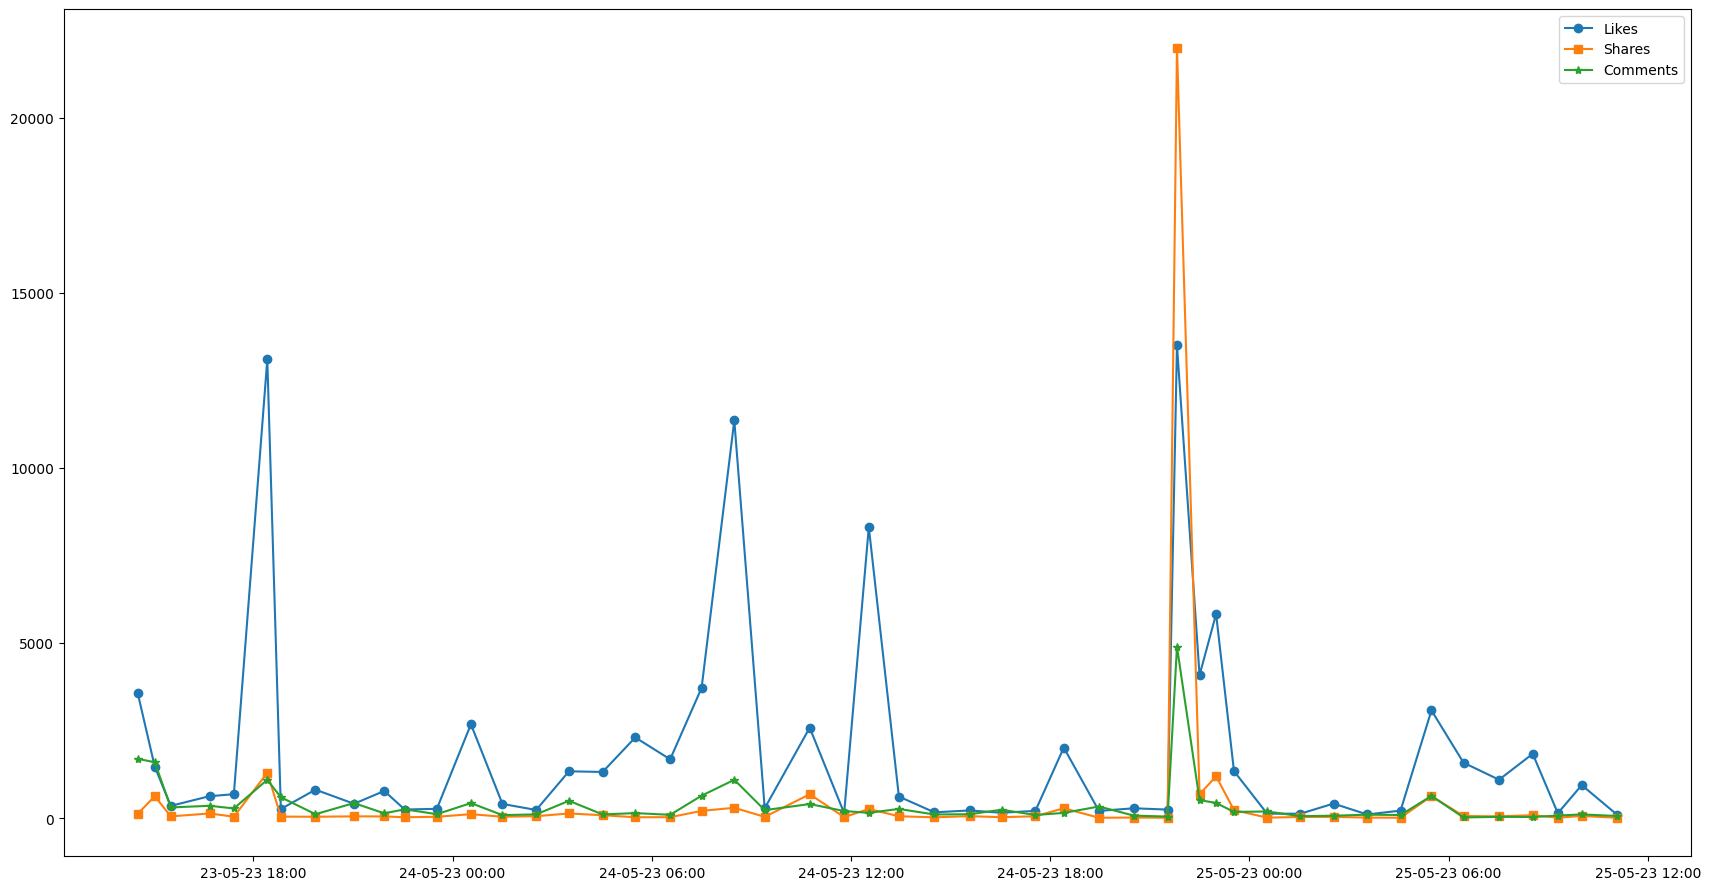

In [8]:
fig, ax = plt.subplots(figsize=(21, 11))
ax.plot(posts_df['time'], posts_df['likes'], label="Likes", marker="o" )
ax.plot(posts_df['time'], posts_df['shares'], label="Shares", marker="s" )
ax.plot(posts_df['time'], posts_df['comments'], label="Comments", marker="*" )
plt.legend()

# formatting time from YYYY-MM-DD H:M to DD-MM-YY H:M for easy readability
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

### Conclusion
From the graph generated above it might be hard to figure out some insights from it since post data is limited and scattered.

Luckily we can try to figure out more insights from the `reactions column`. 

## Case 2: Normalizing reactions column
The column contains data in `JSON/dictionary` format which might be hard to work with. 
But normalization can help us work around it and extract its data.

In [11]:
# we select post_id and reactions column to get a view of reactions column
posts_df[['post_id', 'reactions']].head(10)

,post_id,reactions
0,676752147822114,"{'like': 101, 'love': 4, 'haha': 1, 'wow': 2, ..."
1,676713947825934,"{'like': 948, 'love': 164, 'wow': 2, 'care': 3..."
2,676689697828359,"{'like': 145, 'love': 9, 'haha': 19, 'wow': 1,..."
3,676668564497139,"{'like': 1841, 'love': 173, 'haha': 3, 'wow': ..."
4,676640061166656,"{'like': 1102, 'love': 164, 'haha': 1, 'wow': ..."
5,676615187835810,"{'like': 1588, 'love': 26, 'haha': 1, 'wow': 2..."
6,676589624505033,"{'like': 3081, 'love': 466, 'haha': 7, 'wow': ..."
7,676559881174674,"{'like': 220, 'love': 6, 'haha': 41, 'wow': 2,..."
8,676534264510569,"{'like': 109, 'love': 8, 'haha': 97, 'wow': 2,..."
9,676514317845897,"{'like': 420, 'love': 6, 'haha': 3, 'wow': 9, ..."


Reaction column contains users' reactions to each post, such as Like, love, haha, wow, sad, angry and care

In [19]:
#using the series function to expand reactions columns into multiple columns
posts_df['reactions'] = posts_df['reactions'].apply(lambda x : dict(x) )
posts_df_reactions = posts_df['reactions'].apply(pd.Series)

In [20]:
# merging the expanded columns to a df
posts_df_with_reactions = pd.concat([ posts_df, posts_df_reactions ], axis=1).drop('reactions', axis=1)

In [21]:
posts_df_with_reactions.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,image_ids,was_live,fetched_time,like,love,haha,wow,care,sad,angry
0,676752147822114,"""Approaching wild animals can drastically affe...","""Approaching wild animals can drastically affe...",BBC.COM\nYellowstone kills baby bison after pa...,None,2023-05-25 11:04:34,1685001874,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,[],False,2023-05-25 11:31:20.806724,101.0,4.0,1.0,2.0,2.0,57.0,83.0
1,676713947825934,"""A star whose light will never fade.""\n\nBBC.C...","""A star whose light will never fade.""",BBC.COM\nTributes pour in for 'total legend' T...,None,2023-05-25 10:00:37,1684998037,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,[],False,2023-05-25 11:31:23.682607,948.0,164.0,NaN,2.0,338.0,571.0,1.0
2,676689697828359,The cap limits how much suppliers can charge h...,The cap limits how much suppliers can charge h...,BBC.CO.UK\nEnergy bills to fall under new pric...,None,2023-05-25 09:17:25,1684995445,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,[],False,2023-05-25 11:31:26.615313,145.0,9.0,19.0,1.0,NaN,NaN,1.0
3,676668564497139,"""Once you've seen it, you can't unsee it.""\n\n...","""Once you've seen it, you can't unsee it.""",BBC.COM\nAerial photo of harbour makes it look...,None,2023-05-25 08:32:03,1684992723,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,[],False,2023-05-25 11:31:29.595112,1841.0,173.0,3.0,143.0,3.0,NaN,1.0
4,676640061166656,"""The most incredible animals."" 🦇\n\nBBC.COM\nB...","""The most incredible animals."" 🦇",BBC.COM\nBirth of world's rarest fruit bat cau...,None,2023-05-25 07:31:08,1684989068,None,https://z-p3-external.fmba2-1.fna.fbcdn.net/em...,[],...,[],False,2023-05-25 11:31:32.199858,1102.0,164.0,1.0,13.0,19.0,NaN,1.0


### Conclusion
From the shells above;
* We have been able to extract the json/dictionary values that were in the reactions column
* Created a column for each value and appended it to our dataframe.
* Dropped the reactions column 

## Case 3: Plotting a more insightful linegraph
As our dataframe is now rich of columns that can be used for analysis purposes we will plot a linegraph using the reactions extracted vs timeline 

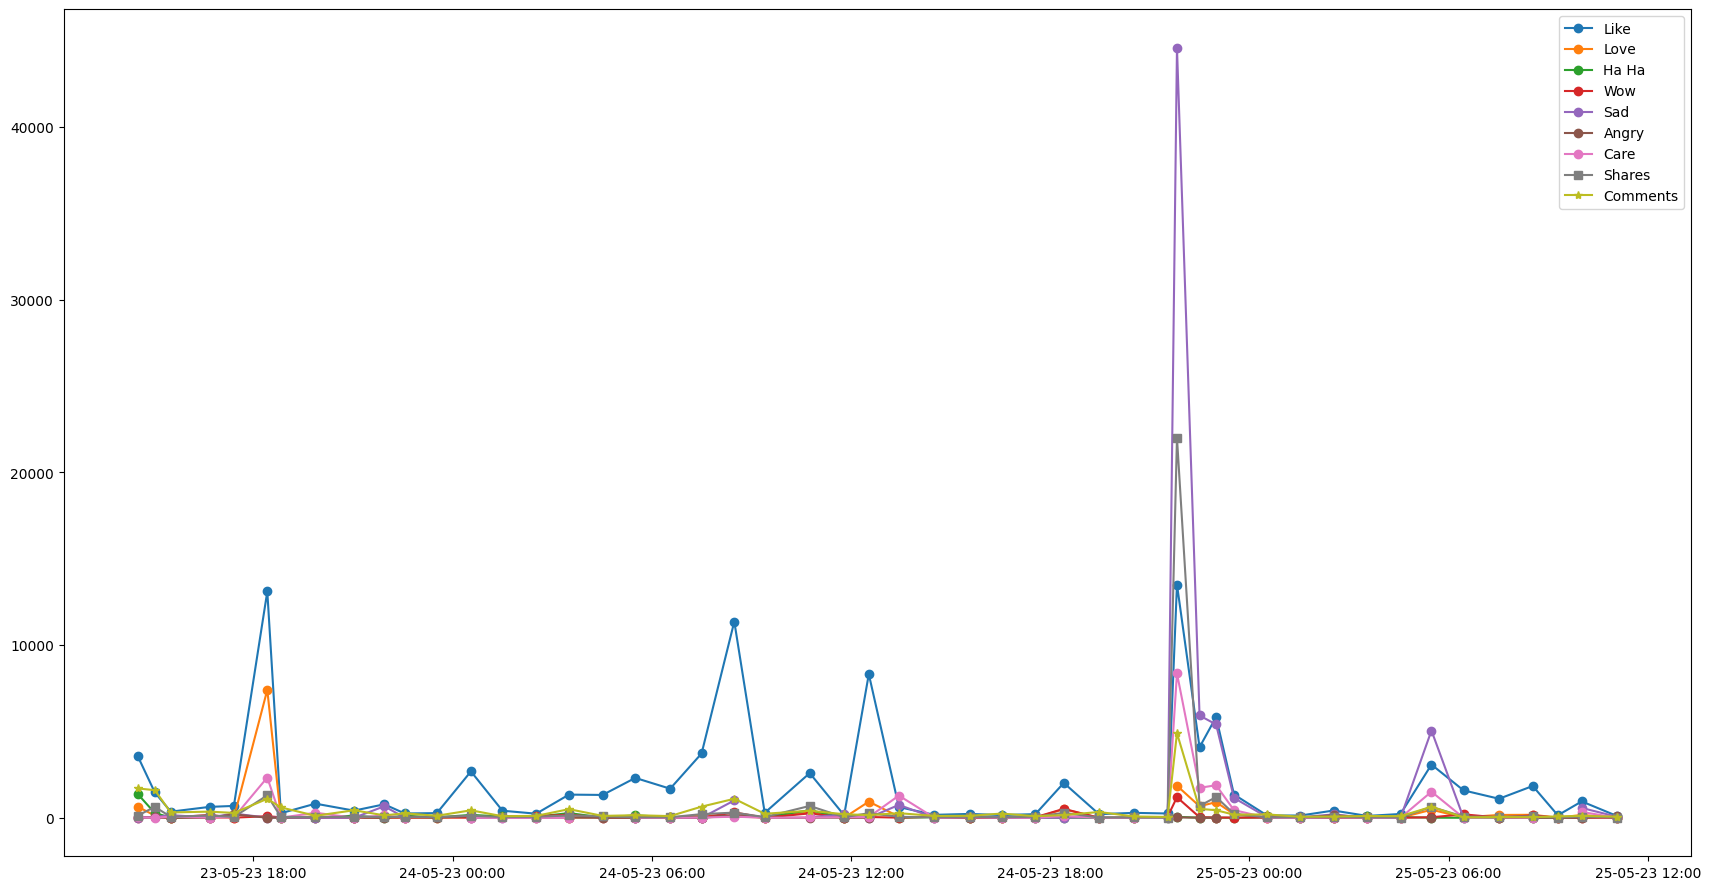

In [23]:
fig, ax = plt.subplots(figsize=(21,11))
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['like'], label="Like", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['love'], label="Love", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['haha'], label="Ha Ha", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['wow'], label="Wow", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['sad'], label="Sad", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['angry'], label="Angry", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['care'], label="Care", marker="o" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['shares'], label="Shares", marker="s" )
ax.plot(posts_df_with_reactions['time'], posts_df_with_reactions['comments'], label="Comments", marker="*" )
plt.legend()


from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

#### Conclusion

Users on Facebook express themselves on the post contents by use of reactions. If something is amazing, funny or exciting you will find more reactions tending to `Ha ha`, `Wow`, `Like`, `Love`

### Extras
 To get more insight in from our dataset, we can use the corrwith function.

#### [corrwith function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html) 
 This is a function that is used  to compute pairwise correlation between columns or rows of 2 df objects.

##### Correlation notes 
* Correlations can be positive, equal to zero, or negative.
* Positive correlation means that two variables tend to move in the same direction.
* Negative correlation indicates that two variables tend to move in opposite directions.
* The correlation of a variable with itself is 1.
  

In [26]:
posts_df_with_reactions[['post_text', 'like', 'love','haha','wow','sad','angry','care','shares','comments']].tail(10)

,post_text,like,love,haha,wow,sad,angry,care,shares,comments
40,"The Star Wars, Thor and Rome actor has died ag...",781.0,18.0,2.0,20.0,666.0,1.0,135.0,53,142
41,The Cabinet Office made the referral after a r...,415.0,8.0,123.0,10.0,1.0,13.0,3.0,56,435
42,"""I'm determined to come back as strong as ever.""",818.0,76.0,2.0,5.0,3.0,NaN,291.0,44,117
43,Footage appeared to show police following two ...,265.0,7.0,7.0,27.0,22.0,12.0,6.0,49,601
44,"""One of a kind"". Read more about Bobi's life: ...",13101.0,7405.0,31.0,93.0,7.0,4.0,2331.0,1300,1100
45,David Boyd lured seven-year-old Nikki Allan to...,688.0,3.0,NaN,8.0,245.0,201.0,18.0,46,282
46,"""It's a valuable lesson learnt.""",632.0,8.0,61.0,167.0,17.0,1.0,7.0,138,357
47,"Divers entered the waters, which are about 30 ...",355.0,5.0,9.0,10.0,151.0,2.0,61.0,55,310
48,"Before his crimes came to light, Harris had be...",1471.0,130.0,279.0,29.0,54.0,19.0,15.0,632,1600
49,"""A star is born.""",3591.0,647.0,1385.0,16.0,8.0,38.0,28.0,123,1700


In [27]:
print(posts_df_with_reactions[
      ['like', 'love','haha','wow','sad','angry','care']].corrwith(posts_df_with_reactions['shares']))

like     0.577567
love     0.267069
haha    -0.012647
wow      0.865557
sad      0.985777
angry   -0.020097
care     0.933658
dtype: float64


In [28]:
print(posts_df_with_reactions[
      ['like', 'love','haha','wow','sad','angry','care']].corrwith(posts_df_with_reactions['comments']))

like     0.677535
love     0.355880
haha     0.298360
wow      0.773722
sad      0.871224
angry    0.041234
care     0.847577
dtype: float64


#### Findings
From our `corrwith` we can be able to establish that;
* `Sad` reaction has more relationship with Shares
* `Sad` reaction also has more relationship with comments